# Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data collection and preprocessing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('train.csv')

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,loan_amount,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,29900000,Approved
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,12200000,Rejected
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,29700000,Rejected
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,30700000,Rejected
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,24200000,Rejected


In [7]:
loan_dataset.shape

(614, 13)

In [8]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,loan_amount
count,614.000000,614.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,342.00000,0.842199,1.493111e+07
std,6109.041673,2926.248369,65.12041,0.364878,9.422733e+06
min,150.000000,0.000000,12.00000,0.000000,5.000000e+05
25%,2877.500000,0.000000,360.00000,1.000000,7.050000e+06
50%,3812.500000,1188.500000,360.00000,1.000000,1.410000e+07
75%,5795.000000,2297.250000,360.00000,1.000000,2.147500e+07
max,81000.000000,41667.000000,480.00000,1.000000,3.950000e+07


In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
 loan_amount          0
Loan_Status           0
dtype: int64

In [10]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [11]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
 loan_amount         0
Loan_Status          0
dtype: int64

In [12]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,loan_amount,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,29900000,Approved
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,12200000,Rejected
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,29700000,Rejected
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,30700000,Rejected
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,24200000,Rejected


In [14]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     284
2      88
1      84
3+     43
Name: count, dtype: int64

In [15]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [16]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    284
2     88
1     84
4     43
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

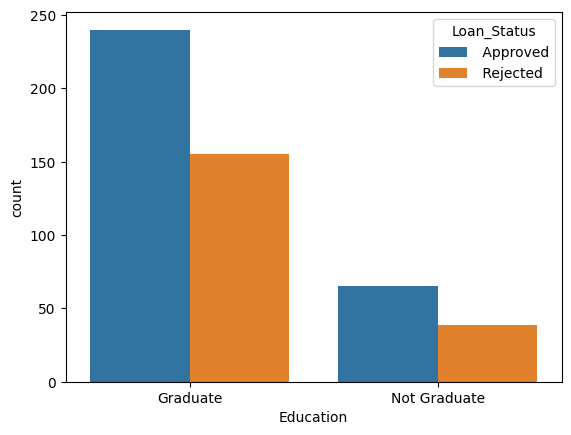

In [17]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

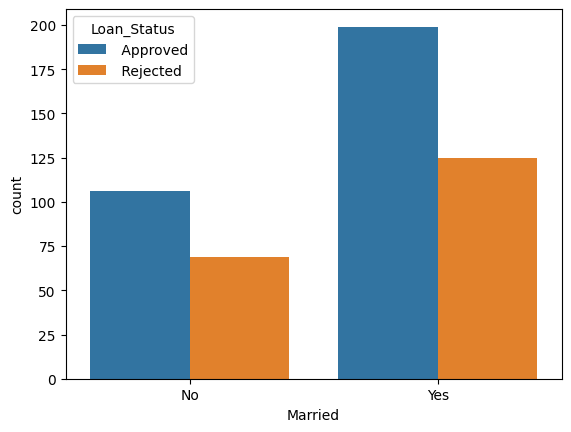

In [18]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

## Handling categorical data

In [19]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,loan_amount,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,360.0,1.0,2,29900000,Approved
1,LP001003,1,1,1,1,0,4583,1508.0,360.0,1.0,0,12200000,Rejected
2,LP001005,1,1,0,1,1,3000,0.0,360.0,1.0,2,29700000,Rejected
3,LP001006,1,1,0,0,0,2583,2358.0,360.0,1.0,2,30700000,Rejected
4,LP001008,1,0,0,1,0,6000,0.0,360.0,1.0,2,24200000,Rejected


## split dataset

In [21]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [22]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  Loan_Amount_Term  Credit_History  Prope

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(499, 11) (449, 11) (50, 11)


# Model Training

# Support Vector Machine

In [25]:
classifier = svm.SVC(kernel='linear')

In [26]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

In [25]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [26]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [27]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [28]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
NBClassifier = GaussianNB()


In [31]:
#training the naive bayes classifier
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [32]:
X_test_prediction = NBClassifier.predict(X_test)

In [33]:
X_test_prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0])

In [34]:
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [35]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


# Desicion Tree



In [36]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier()
DTClassifier.fit(X_train,Y_train)


DecisionTreeClassifier()

In [37]:
DT_X_test_prediction = DTClassifier.predict(X_test)

In [38]:
DT_X_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [39]:
test_data_accuray = accuracy_score(DT_X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7708333333333334


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFClassifier=RandomForestClassifier()
RFClassifier.fit(X_train,Y_train)


RandomForestClassifier()

In [41]:
RF_X_test_prediction = RFClassifier.predict(X_test)
RF_X_test_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0])

In [42]:
RF_test_data_accuray = accuracy_score(RF_X_test_prediction,Y_test)
print('Accuracy on test data : ', RF_test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [43]:
# random forest classifier
from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 9,  6],
       [ 2, 31]])

#Saving the model

In [44]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(classifier, file)